<a href="https://colab.research.google.com/github/AmirHoseein99/Movie_Recommendation_system/blob/master/Movie_Recommender_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

Content based recommendation system

In [12]:
file_path = 'Kljucne_rijeci.txt'

data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(' - ') 
        if len(parts) == 2:
            fakultet, keywords = parts
            data.append({'title': fakultet, 'keywords': keywords})

df = pd.DataFrame(data)
df


,title,keywords
0,Filološki fakultet,"jezici, lingvistika, književnost, fonetika, mo..."
1,Akademija umjetnosti,"slikarstvo, ples, film, grafički dizajn, muzik..."
2,Fizičko vaspitanje i sport,"sport, trening, nutricionizam, atletika, fitne..."
3,Filozofski fakultet,"filozofija, psihologija, istorija, logika, fil..."
4,Šumarski fakultet,"biologija, hemija, šumar, šumarstvo, priroda, ..."
5,Fakultet političkih nauka,"sociologija, istorija, politikologija, politik..."
6,Pravni fakultet,"sociologija, istorija, pravo, pravnik, advokat..."
7,Poljoprivredni fakultet,"hemija, matematika, biologija, zoologija, agro..."
8,Saobraćajni fakultet,"logistika, špedicija, matematika, transport, p..."
9,Tehnološki fakultet,"hemija, prehrambena industrija, biologija, tek..."


In [13]:
df.isna().sum()

title       0
keywords    0
dtype: int64

In [14]:
df["keywords"] = df["keywords"].apply(lambda x : x.split(","))
df["keywords"] = df["keywords"].apply(lambda x : ' '.join(word for word in x))
df.head()

,title,keywords
0,Filološki fakultet,jezici lingvistika književnost fonetika mo...
1,Akademija umjetnosti,slikarstvo ples film grafički dizajn muzik...
2,Fizičko vaspitanje i sport,sport trening nutricionizam atletika fitne...
3,Filozofski fakultet,filozofija psihologija istorija logika fil...
4,Šumarski fakultet,biologija hemija šumar šumarstvo priroda ...


In [15]:
vectorizer = CountVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['keywords'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
import pandas as pd

dl = pd.DataFrame(cosine_sim, columns=df['keywords'], index=df['keywords']).reset_index()

dl.head()

keywords,keywords,jezici lingvistika književnost fonetika morfologija,slikarstvo ples film grafički dizajn muzika fotografija animacija video slikar šminker glumac fotograf animator umjetnik grafika pozorište televizija,sport trening nutricionizam atletika fitness gimnastika rehabilitacija,filozofija psihologija istorija logika filozof psiholog istoričar pedagog pedagogija latinski jezik učitelj učiteljica vaspitač vaspitačica,biologija hemija šumar šumarstvo priroda ekologija,sociologija istorija politikologija politikolog zakon pravo sociolog novinarstvo komunikologija novinar komunikolog marketing televizija mediji radio psihologija pedagogija socijalni rad politika,sociologija istorija pravo pravnik advokat ekonomija politikologija zakon politika sudija sutkinja ustavno pravo kriminologija kriminalistika notar pravosuđe tužilac,hemija matematika biologija zoologija agronom hidroinženjer poljoprivreda veterina veterinar mesar pekar,logistika špedicija matematika transport pilot drumski saobraćaj željeznički saobraćaj vazduhoplovstvo informacione tehnologije telekomunikacije saobraćaj,hemija prehrambena industrija biologija tekstilna industrija grafički dizajn štampa biohemija obućar,matematika hidrologija statistika vjerovatnoća arhitektura arhitekta građevina građevinarstvo geodezija dizajn umjetnost urbanizam dizajner moler projektovanje građevinski tehničar inženjerstvo geologija mehanika,matematika informatika fizika hemija biologija geografija informatičar biolog matematičar fizičar hemičar vještačka inteligencija računarske mreže operativni sistemi programiranje IT ekologija geoinformacioni sistemi bioinformatika biohemija zoologija genetika mikrobiologija hidrologija geomorfologija informacione tehnologije softversko inženjerstvo turizam turizmologija web dizajn kriptografija dizajn algoritmi podaci kombinatorika vjerovatnoća statistika baze podataka informacioni sistemi linearna algebra internet programiranje mobilne aplikacije logika operaciona istraživanja geometrija računarstvo algebra softverski inženjer termodinamika mehanika elektrodinamika elektrotehnika astrofizika nuklearna fizika,matematika mašinstvo mašinski tehničar mehanika termodinamika hidroenergetika termoenergetika mehatronika elektronika robotika fizika,matematika fizika informatika informatičar fizičar IT informacione tehnologije računarske mreže operativni sistemi web dizajn dizajn softversko inženjerstvo softver softverski inženjer računarstvo baze podataka elektro inženjer inženjer elektronika telekomunikacije informacioni sistemi elektroenergetika automatika računarsko inženjerstvo programiranje podaci algoritmi kriptografija internet programiranje robotika elektrotehnika električne instalacije termodinamika statika,biologija hemija medicina farmacija anatomija doktor doktorica stomatolog kardiolog ginekolog neurolog fizijatar biohemija biofizika genetika mikrobiologija molekularna dijagnostika psihijatar toksikologija reumatologija dermatovenerologija dermatolog dermatovenerolog endokrinologija endokrinolog neurologija ginekologija stomatologija epidemiolog hirurg hirurgija akušerstvo pedijatrija pedijatar otorinolaringolog otorinolaringologija farmakologija logoped oftamologija oftamolog radiolog laborant farmaceut radiologija nuklearna medicina pedijatrija pedijatar protetika neuropsihijatrija neuropsihijatar patologija patolog kozmetologija kozmetolog ortoped fizioterapeut sanitarno inženjerstvo,matematika statistika ekonomija finansije revizor aktuar bankar analitičar blagajnik marketing menadžment poslovna informatika menadžment ljudskih resursa osiguranje bankarstvo aktuarstvo preduzetništvo ekonomista,forenzika forenzičar kriminalistika bezbijednost prekršajno pravo policija policajac
0,jezici lingvistika književnost fonetika mo...,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,slikarstvo ples film grafički dizajn muzik...,0.0,1.0,0.0,0.0,0.0,0.052705,0.000000,0.000000,0.0,

              Word  Frequency
31          dizajn          7
123     matematika          7
204        sistemi          5
97    inženjerstvo          5
81          hemija          5
25       biologija          5
184  programiranje          4
96        inženjer          4
57          fizika          4
178          pravo          4


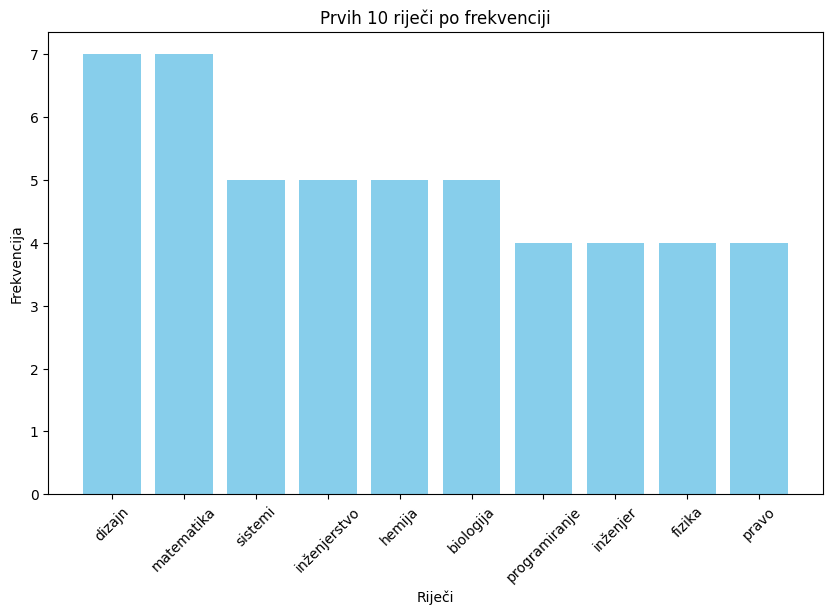

In [17]:
word_counts = tfidf_matrix.toarray().sum(axis=0)

word_freq_df = pd.DataFrame({'Word': vectorizer.get_feature_names_out(), 'Frequency': word_counts})

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df.head(10))

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:10], word_freq_df['Frequency'][:10], color='skyblue')
plt.xlabel('Riječi')
plt.ylabel('Frekvencija')
plt.title('Prvih 10 riječi po frekvenciji')
plt.xticks(rotation=45)
plt.show()

In [18]:
def initialize_recommendation_system():
    file_path = 'Kljucne_rijeci.txt'
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(' - ') 
            if len(parts) == 2:
                fakultet_name, keywords = parts
                data.append({'title': fakultet_name, 'keywords': keywords})

    df = pd.DataFrame(data)

    df["keywords"] = df["keywords"].apply(lambda x : x.split(","))
    df["keywords"] = df["keywords"].apply(lambda x : ' '.join(word for word in x))

    vectorizer = CountVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['keywords'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    return df, cosine_sim

def recommend(fakultet):
    df, cosine_sim = initialize_recommendation_system()
    if not any(df['title'] == fakultet):
        print(f"University '{fakultet}' not found in the dataset.")
        return
    
    idx = df.index[df['title'] == fakultet].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:4]

    university_indices = [i[0] for i in sim_scores]
    university_similarities = [i[1] for i in sim_scores]

    recommendations = df['title'].iloc[university_indices]
   
    recommendations_list = [f"{naziv} - {sličnost:.4f}" for naziv, sličnost in zip(recommendations, university_similarities)]
        
    return recommendations_list


In [19]:
recommend("Elektrotehnički fakultet")

['Prirodno-matematički fakultet - 0.6235',
 'Mašinski fakultet - 0.1863',
 'Arhitektonsko-građevinski fakultet - 0.1443']

In [20]:
recommend("Prirodno-matematički fakultet")

['Elektrotehnički fakultet - 0.6235',
 'Arhitektonsko-građevinski fakultet - 0.1964',
 'Mašinski fakultet - 0.1584']